In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stu_vle = pd.read_csv('data/stvl_ccc14b.csv')
stu_as = pd.read_csv('data/stas_ccc14b.csv')
ass = pd.read_csv('data/ass_ccc14b.csv')
vle = pd.read_csv('data/vle_ccc14b.csv')
stu_info = pd.read_csv('data/stuinfo_ccc14b.csv')
stu_reg = pd.read_csv('data/stureg_ccc14b.csv')

# Preprocessing

#### How big is pop of interest?

In [4]:
ass.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,CCC,2014B,24286,CMA,18.0,2.0
1,CCC,2014B,24287,CMA,67.0,7.0
2,CCC,2014B,24288,CMA,137.0,8.0
3,CCC,2014B,24289,CMA,207.0,8.0
4,CCC,2014B,24282,TMA,32.0,9.0


First, drop students who withdrew in first part of course. Assessment due at day 67, but a lot of students likely dropped out very close to that due date.

In [62]:
num_wd_early = stu_reg[stu_reg.date_unregistration <= 67]['id_student'].count()
num_wd_early

610

In [63]:
num_wd_prior = stu_reg[stu_reg.date_unregistration < 0]['id_student'].count()
num_wd_prior

250

In [64]:
len(stu_reg)

1936

In [65]:
stu_reg['date_unregistration'].value_counts().sort_index()[0:70]

0.0     36
3.0      8
4.0      5
5.0      4
7.0      6
9.0      3
10.0     6
11.0     5
12.0    19
13.0     2
14.0     1
15.0     1
16.0    10
17.0     6
18.0    10
19.0     9
20.0    10
21.0     2
22.0     2
23.0     4
24.0     8
25.0     9
26.0    11
27.0     9
28.0     2
29.0     2
30.0     7
31.0    10
32.0     6
33.0    13
        ..
38.0    11
39.0     9
40.0     4
41.0     3
42.0     1
44.0    10
45.0     7
46.0     7
47.0     3
48.0     5
49.0     3
50.0     1
51.0     4
52.0     3
53.0     5
54.0     3
55.0     3
56.0     3
57.0     1
58.0     4
59.0     2
60.0     1
61.0     2
62.0     3
64.0     1
65.0     3
66.0     6
67.0    10
68.0     4
69.0     5
Name: date_unregistration, Length: 63, dtype: int64

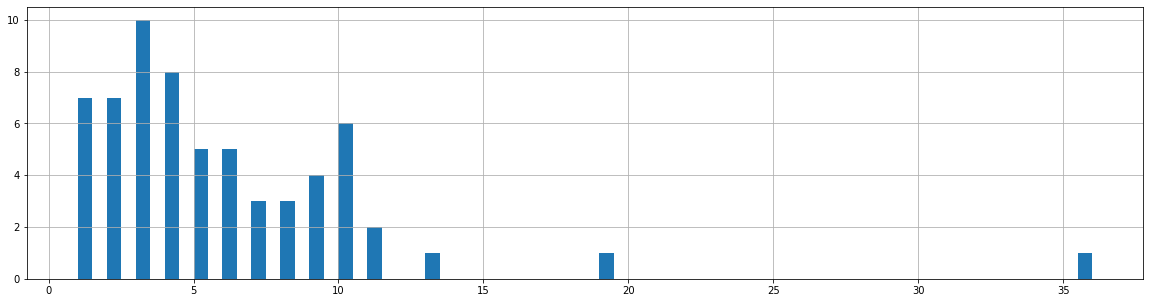

In [66]:
stu_reg['date_unregistration'].value_counts().sort_index()[0:70].hist(bins=70, figsize=(20,5))

In [67]:
print("Total students: ", len(stu_reg))
print(num_wd_prior, " withdrew before course, and ", num_wd_early, " withdrew before key assessment.")
print("Students left: ", len(stu_reg) - num_wd_prior - num_wd_early)

Total students:  1936
250  withdrew before course, and  610  withdrew before key assessment.
Students left:  1076


In [68]:
stu_reg['final_result'] = stu_reg['id_student'].map(stu_info.set_index('id_student')['final_result'])

In [69]:
stu_reg.final_result.replace(to_replace=dict(Pass=1, Distinction=1, Fail=0, Withdrawn=0), inplace=True)

In [70]:
stu_reg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result
0,CCC,2014B,28418,-37.0,NaN,0
1,CCC,2014B,29764,-34.0,NaN,1
2,CCC,2014B,29820,-57.0,NaN,1
3,CCC,2014B,40333,-30.0,17.0,0
4,CCC,2014B,40604,-17.0,NaN,1


In [79]:
len(stu_reg[(stu_reg.date_unregistration > 67) | (stu_reg.date_unregistration.isna())][stu_reg.final_result == 1])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


663

In [142]:
poi = stu_reg[(stu_reg['date_unregistration']> 67) | (stu_reg.date_unregistration.isna())]

In [144]:
poi.shape

(1326, 6)

In [143]:
poi[poi.final_result==1].shape

(663, 6)

In [145]:
663 *2

1326

In [118]:
df_stickers = stu_reg[stu_reg.date_unregistration.isna()]
df_stickers.shape

(1038, 6)

In [119]:
df_quitters = stu_reg[stu_reg.date_unregistration.isna()!=True]
df_quitters.shape

(898, 6)

In [115]:
df_quitters[df_quitters.date_unregistration > 67].shape

(288, 6)

In [116]:
df_quitters[df_quitters.date_unregistration <= 67].shape

(610, 6)

#### Drop the quitters

In [147]:
stu_reg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result
0,CCC,2014B,28418,-37.0,NaN,0
1,CCC,2014B,29764,-34.0,NaN,1
2,CCC,2014B,29820,-57.0,NaN,1
3,CCC,2014B,40333,-30.0,17.0,0
4,CCC,2014B,40604,-17.0,NaN,1


In [148]:
stu_reg.drop(stu_reg[stu_reg.date_unregistration <= 67].index, inplace=True)

In [155]:
stu_reg[stu_reg.final_result == 0].shape

(663, 6)

In [157]:
stu_reg['id_student'].nunique()

1326

In [161]:
len(stu_reg['id_student'].values)

1326

In [162]:
pop_of_interest = stu_reg['id_student'].values

In [168]:
stvl_pop = stu_vle.drop(stu_vle[~stu_vle.id_student.isin(pop_of_interest)].index)

#### Drop days after 67, and sum clicks to daily basis

In [173]:
stvl_tst = stvl_pop.drop(stvl_pop[stvl_pop.date > 67].index)

In [179]:
stvl_tst = stvl_tst.groupby(['date', 'id_student']).sum().drop('id_site', axis=1)

In [181]:
stvl_tst.head()

sum_click
date id_student           
-18  29764              13
     29820               2
     42638              20
     46605              23
     57340               1

### Make dates the features

In [190]:
stvl_piv = stvl_tst.reset_index().pivot(index='id_student', columns='date', values='sum_click')

In [191]:
stvl_piv.head()

date,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,...,58,59,60,61,62,63,64,65,66,67
id_student,,,,,,,,,,,,,,,,,,,,,
28418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,37.0,NaN,16.0
29764,13.0,15.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,44.0,9.0,5.0,30.0,NaN,6.0,82.0,NaN,103.0
29820,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,124.0,NaN,1.0,33.0,NaN
40604,NaN,NaN,4.0,9.0,NaN,NaN,9.0,NaN,24.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,89.0
42638,20.0,22.0,7.0,9.0,NaN,5.0,NaN,5.0,2.0,3.0,...,5.0,32.0,68.0,37.0,36.0,41.0,6.0,21.0,29.0,14.0


### Add classes

In [192]:
stvl_piv['final_result'] = stvl_piv.index.map(stu_info.set_index('id_student')['final_result'])

In [194]:
stvl_piv.final_result.replace(to_replace=dict(Pass=1, Distinction=1, Fail=0, Withdrawn=0), inplace=True)

In [205]:
stvl_piv.fillna(0, inplace=True)

In [206]:
stvl_piv.head()

date,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,...,59,60,61,62,63,64,65,66,67,final_result
id_student,,,,,,,,,,,,,,,,,,,,,
28418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,37.0,0.0,16.0,0
29764,13.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.0,9.0,5.0,30.0,0.0,6.0,82.0,0.0,103.0,1
29820,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,124.0,0.0,1.0,33.0,0.0,1
40604,0.0,0.0,4.0,9.0,0.0,0.0,9.0,0.0,24.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,89.0,1
42638,20.0,22.0,7.0,9.0,0.0,5.0,0.0,5.0,2.0,3.0,...,32.0,68.0,37.0,36.0,41.0,6.0,21.0,29.0,14.0,1


### Convert to diffs

In [214]:
stvl_dif = stvl_piv.diff(axis=1)

In [217]:
stvl_dif.drop(-18, axis=1, inplace=True) #drop first column which becomes all NaNs after diff

Oops, gotta put final result class back in. The diff did away with it

In [218]:
stvl_dif['final_result'] = stvl_dif.index.map(stu_info.set_index('id_student')['final_result'])

In [221]:
stvl_dif.final_result.replace(to_replace=dict(Pass=1, Distinction=1, Fail=0, Withdrawn=0), inplace=True)

In [222]:
stvl_dif.head()

date,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,...,59,60,61,62,63,64,65,66,67,final_result
id_student,,,,,,,,,,,,,,,,,,,,,
28418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,32.0,-37.0,16.0,0
29764,2.0,-14.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.0,-35.0,-4.0,25.0,-30.0,6.0,76.0,-82.0,103.0,1
29820,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,124.0,-124.0,1.0,32.0,-33.0,1
40604,0.0,4.0,5.0,-9.0,0.0,9.0,-9.0,24.0,-14.0,-3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,60.0,1
42638,2.0,-15.0,2.0,-9.0,5.0,-5.0,5.0,-3.0,1.0,-3.0,...,27.0,36.0,-31.0,-1.0,5.0,-35.0,15.0,8.0,-15.0,1


# Random Forest run

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [224]:
X = stvl_dif.drop(['final_result'], axis=1).values

In [225]:
y = stvl_dif['final_result'].values

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

In [236]:
rf_clf = RandomForestClassifier(n_estimators = 50, 
                                max_depth    =  3,
                                random_state = 21)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [237]:
rf_clf.score(X_test, y_test)

0.6984615384615385

In [243]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators    = 100, 
                              max_depth    =  5,
                              random_state = 21)
xgb_clf.fit(X_train, y_train)
xgb_clf.score(X_test, y_test)

0.6984615384615385

Wow, the boosted trees tie.